### Loading and preprocessing patch clamp data

In [5]:
%matplotlib inline
import sys
sys.path.append("/home/diego/Dropbox/hold_noise/iclamp-glm/")

(<Figure size 864x360 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f89e79abf60>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f89e78f2630>))

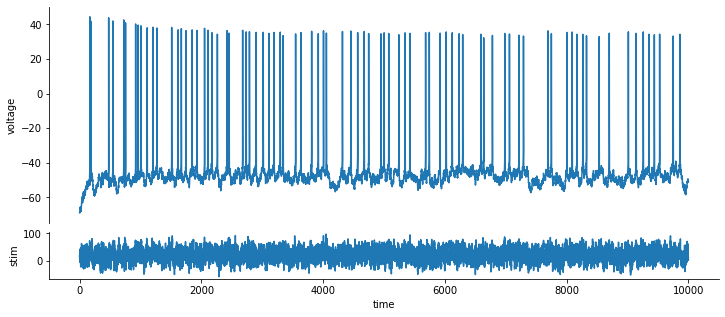

In [6]:
import numpy as np
from icglm.iclamp import IClamp
ic = IClamp.load_from_abf(path='./18o03049.abf')
ic = ic.subtract_Ih(th=1000.1).restrict(t0=1000.1, tf=11000.1)
ic.plot(sweeps=[0])

### Fitting encoding GLM to data

(<Figure size 648x288 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f89e7875be0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f89e7894c18>))

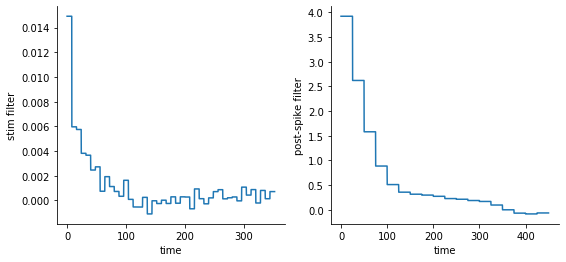

In [7]:
from icglm.glm_fitting import GLMFitter
glm_fit = GLMFitter(ic).set_mask_spikes(thr=-13).subsample(1)
glm_fit.Ih = 0

tbins_kappa = np.arange(0, 360, 8)
tbins_eta = np.arange(0, 475, 25)

# glm_fit.fit(tbins_kappa=tbins_kappa, tbins_eta=tbins_eta, prior='exponential', prior_pars=[0, 1, 500, 1 / 50])
glm_fit.fit(tbins_kappa=tbins_kappa, tbins_eta=tbins_eta, prior='smooth_2nd_derivative', prior_pars=[0, 1e2])
glm_fit.plot_filters()

In [22]:
tr_list = [3, 10, 50, 100, 200]
arr = np.zeros((5, 10)) * np.nan

from icglm.kernels import KernelRect
kernel1, kernel2 = KernelRect.kistler_kernels(4, 1)

for ii, trials in enumerate(tr_list):
    for jj in range(10):
        glm_fit.set_mask_spikes_model(trials=trials)
        glm_fit.set_Md(kernel1, kernel2, biased=False)
        arr[ii, jj] = glm_fit.Md

In [23]:
import matplotlib.pyplot as plt

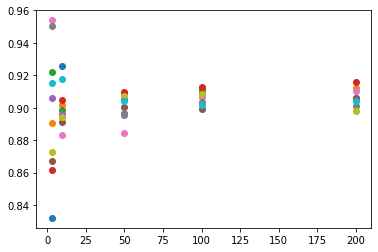

In [24]:
plt.figure()
plt.plot(tr_list, arr, 'o')

In [ ]:
from icglm.glm_fitting import GLMFitter
glm_fit = GLMFitter(ic).set_mask_spikes(thr=-13).subsample(1)
glm_fit.Ih = 0

tbins_kappa = np.arange(0, 360, 8)
tbins_eta = np.arange(0, 475, 25)

for lam in [1e-1, 1e0, 1e1, 1e2]:
    glm_fit.fit(tbins_kappa=tbins_kappa, tbins_eta=tbins_eta, prior='smooth_2nd_derivative', prior_pars=[0, 1e3])
#     glm_fit.log
#     glm_fit.plot_filters()
    print(kwnknw)